# Logistic model fitting using Sequential Monte Carlo

This example illustrates how to use SMC to sample from a posterior distribution for the logistic model, with normal errors. This example also indicates how it is typically necessary to tune hyperparameters to ensure good algorithmic performance on a given problem.

In [1]:
from __future__ import print_function
import pints
import pints.toy as toy
import pints.plot
import numpy as np
import matplotlib.pyplot as plt

# Load a forward model
model = toy.LogisticModel()

# Create some toy data
real_parameters = [0.015, 500]
times = np.linspace(0, 1000, 1000)
org_values = model.simulate(real_parameters, times)

# Add noise
noise = 10
values = org_values + np.random.normal(0, noise, org_values.shape)
real_parameters = np.array(real_parameters + [noise])

# Get properties of the noise sample
noise_sample_mean = np.mean(values - org_values)
noise_sample_std = np.std(values - org_values)

# Create an object with links to the model and time series
problem = pints.SingleOutputProblem(model, times, values)

# Create a log-likelihood function (adds an extra parameter!)
log_likelihood = pints.UnknownNoiseLogLikelihood(problem)

# Create a uniform prior over both the parameters and the new noise variable
log_prior = pints.UniformLogPrior(
    [-5, 400, noise*0.1],
    [5, 600, noise*100]
)

# Select mean of initial proposal distribution
x0 = [0.015, 500, 10]

# Create mcmc routine
sampler = pints.SMC(log_likelihood, log_prior, x0)

# Set number of particles
sampler.set_n_particles(10000)

# Run sampler
samples = sampler.run()

Running Sequential Monte Carlo
Total number of particles: 10000
Number of temperatures: 10
Resampling at end of each iteration
Number of MCMC steps at each temperature: 1
Temperature Eval. Time m:s
 0.99972    30000   0:02.2
 0.99923    40000   0:07.2
 0.99785    50000   0:11.8
 0.99401    60000   0:17.0
 0.98332    70000   0:22.2
 0.95358    80000   0:27.7
 0.87085    90000   0:32.8
 0.64062    100000   0:37.7
 0          110000   0:42.6


## Plot results

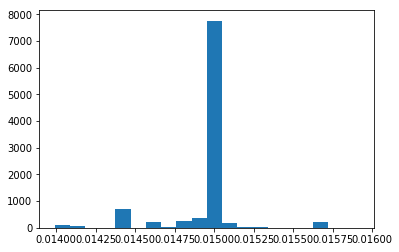

5067.295397628088


In [2]:
plt.hist(samples[:, 0], 20)
plt.show()
print(sampler.ess())